In [314]:
import numpy as np
import matplotlib.pyplot  as plt

with open('data_classification_problem5.csv') as file:
    x0_coordinates = [] # list for the points in x
    x1_coordinates = [] # list for the points in y
    labels = [] # list for the labels
    
    # extracting data from the csv file
    for line in file.readlines():
        point = line.rstrip('\n').split(',')
        point = list(map(float,point))
        x0_coordinates.append(point[0])
        x1_coordinates.append(point[1])
        labels.append(point[2])
    data_set_size = len(labels)
    #plt.plot(x_coordinates, y_coordinates,'ro')
    x0 = np.matrix(x0_coordinates).T
    x1 = np.matrix(x1_coordinates).T
    a = x0_coordinates
    b = x1_coordinates
    li = labels
    labels = np.matrix(labels).T
    #print(labels)
    print(data_set_size)
    

100


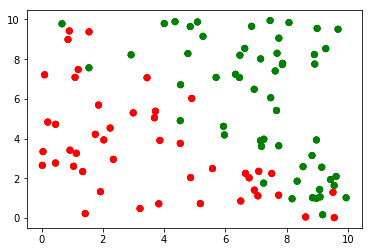

In [325]:
# creating color vector
colors = []
for i in range(len(labels)):
    if(labels[i] == 1.0):
        colors.append('g')
    else:
        colors.append('r')
    
    

plt.scatter(x_coordinates, y_coordinates, c =colors)
plt.show()
# green represents that the student passes
# red, the student fails

In [365]:
# gradient descent for linear regression
# We want to create a line such that minimizes the error between the square distance of an arbitray point (x,y) and the the line equation y = Mx +b
# All vectors are going to be column vectors unless told otherwise

# theta will be numpy vector that contains all the parameters of our model
#                  theta1, theta2 of the theta vector
theta = np.matrix([[0.5,0.5,0.5]]).T 
loss_vector = []

def sigmoid(x):
    return 1/(1+np.exp(-10*x))
def log(x):
    return np.log(x)

def create_input_matrix(x,y):
    # can be generalized for the length of theta
    ones_vec = np.matrix(np.ones(100)).T 
    b = np.hstack((ones_vec,x))
    # horizontally stack the vectors to form the input matrix X
    X = np.hstack((b,y))
    return X # where X is the input Matrix in our model 

def predict (X,theta):
    return(sigmoid(np.matmul(X,theta)))


# y_prediction is a scalar value 
# y_target is a vector that contains all 
def Loss(X,theta,y):
    h = predict(X,theta)
    ones_vec_y = np.ones_like(h)
    ones_vec_h = np.ones_like(y)
    a = np.matmul((ones_vec_y-y).T,log(ones_vec_y-h))
    b = np.matmul(y.T,log(h))
    b = -b
    grad = b-a
    grad = grad/(1.0*data_set_size)
    
    return grad 
            
# y is our target vector, X is the input matrix, theta the parameter vector 
#lr is the learning rate for gradient descent and err is our accepted error  
def gradient(X,theta,y):
    delta = (predict(X,theta)-y)
    grad = np.matmul(X.T,delta)
    grad = grad/(1.0*data_set_size)
    return grad
    
    
# keep track of the dimensions of y, x and theta
def gradient_descent(y,X,theta,lr):
    pred = predict(X,theta)
    # while the error is big continue doing gradient descent        
    #while(MSE_Loss(y_target, y_pred) >= err):
    for i in range(1500):
        loss_vector.append(np.array(Loss(X,theta,y))[0])
        theta = theta -(lr*gradient(X,theta,y))
        #print ("predicted \n" + str(predict(X,theta).T))
        #print('\n')
        #print ("target \n" + str(y.T))
        
    return theta # returns the optimal theta vector
            
            

    
#print (theta)
X=create_input_matrix(x0,x1)
#log(predict(X,theta))
#Loss(X,theta,labels)
#gradient(X,theta,labels)
lr = 0.1 # the learning rate that worked for me
err = 0.5 
parameters = gradient_descent(labels,X,theta, lr)
num = [i for i in range(1500)]
error= []
print(parameters)
#for i in range(0,500,50):
    #error.append(loss_vector[i])

[[0.5]
 [0.5]
 [0.5]]
predicted 
[[1.         1.         1.         1.         1.         0.99999984
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  0.99999996 1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.9999623  1.
  1.         1.         1.         0.99999982 1.         1.
  1.         1.         0.99999996 1.         1.         1.
  1.         1.         1.         1.         1.         0.9999999
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.99999997 1.         1.
  1.         1.         1.         1.         1.    

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]



predicted 
[[0.11321863 0.83094138 0.06565243 0.54027446 0.3590729  0.01268012
  0.8665519  0.38879645 0.63839113 0.14345046 0.42755458 0.806938
  0.05150985 0.88874412 0.91808957 0.29165559 0.90406048 0.07550993
  0.09668066 0.00695929 0.68496266 0.91670051 0.84159094 0.00992113
  0.00563462 0.00545419 0.82655534 0.10139648 0.01034566 0.9135889
  0.50574503 0.01729424 0.02386672 0.33761929 0.0049437  0.66027336
  0.78341575 0.23634799 0.13487829 0.10508898 0.00852672 0.87781937
  0.05674643 0.85421144 0.002099   0.0033375  0.06095849 0.65868934
  0.83047928 0.55705163 0.00738492 0.28312305 0.00394898 0.62523203
  0.91177691 0.68527268 0.61924503 0.5406313  0.47265554 0.00228835
  0.00738281 0.15791071 0.00385741 0.58061944 0.63203321 0.87507447
  0.00313063 0.51747272 0.8674824  0.54926139 0.00595756 0.66703338
  0.54531647 0.42503791 0.22694909 0.44674298 0.00504242 0.13107667
  0.03867492 0.76334095 0.83140161 0.90009887 0.02793305 0.01496318
  0.00316342 0.4746743  0.93840577 0.03

  1.         1.         1.         0.99999538]]


target 
[[1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
  1. 0. 1. 0.]]
predicted 
[[1.         0.99999687 0.73452524 0.99999991 1.         0.05043174
  0.99999981 1.         1.         0.99837932 1.         0.99999997
  0.99994983 0.99999944 0.99999973 0.99999881 0.99999999 1.
  0.99999961 0.99999326 1.         1.         1.         0.90882702
  0.05774531 0.99926237 1.         0.99998571 0.99587747 0.99999999
  1.         0.80383845 0.99999839 1.         0.18081813 1.
  0.99999981 0.99990387 1.         0.99986409 0.00156829 0.99999988
  1.         1.         0.97651669 0.01688647 0.99938824 1.
  1.         1.         0.07510732 0.99999945 0.99996481 1.
  0.99999998 0.99999609 1.         0.99

  1.00000000e+00 9.99997073e-01 1.00000000e+00 9.74944713e-01]]


target 
[[1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
  1. 0. 1. 0.]]
predicted 
[[9.99852730e-01 9.93173769e-01 6.79130468e-03 9.98646453e-01
  9.99975716e-01 2.03273452e-04 9.99070862e-01 9.99989087e-01
  9.99940824e-01 2.80164241e-01 9.99998437e-01 9.99681286e-01
  6.83461821e-01 9.98306189e-01 9.99128846e-01 9.86811017e-01
  9.99903204e-01 9.99671441e-01 9.87156141e-01 7.35798974e-01
  9.99999922e-01 9.99947486e-01 9.99920445e-01 5.71039454e-03
  1.45355222e-04 9.80258862e-02 9.99999904e-01 8.79442923e-01
  4.63774102e-02 9.99891174e-01 9.99993318e-01 4.26502523e-03
  9.32824509e-01 9.99884314e-01 3.17231901e-04 9.99998242e-01
  9.98740791e-01 7.77950243e-01 9.99935957e-0

  1. 0. 1. 0.]]
predicted 
[[9.93842050e-01 8.42071698e-01 4.84157984e-04 9.57635661e-01
  9.98877652e-01 1.80497732e-05 9.71313714e-01 9.99464071e-01
  9.97554331e-01 2.00921137e-02 9.99910668e-01 9.88922456e-01
  8.70815808e-02 9.51496912e-01 9.73402348e-01 7.26804449e-01
  9.96370677e-01 9.87013273e-01 7.22651158e-01 1.01109080e-01
  9.99994508e-01 9.97939272e-01 9.96908754e-01 3.86183138e-04
  1.28980907e-05 5.62099596e-03 9.99993536e-01 2.30461617e-01
  2.75067974e-03 9.95975198e-01 9.99663978e-01 3.00592149e-04
  3.39509614e-01 9.95286438e-01 2.63212321e-05 9.99903638e-01
  9.61678078e-01 1.36348861e-01 9.97146385e-01 7.18529695e-02
  1.71397612e-06 9.79328673e-01 9.70083144e-01 9.99090133e-01
  4.11372492e-04 4.52368633e-06 2.22519970e-02 9.99893634e-01
  9.99988907e-01 9.99982173e-01 1.76295994e-05 8.06327822e-01
  2.96617830e-02 9.99972064e-01 9.93452018e-01 7.53198684e-01
  9.99922394e-01 7.63010915e-01 9.96809087e-01 3.77588742e-06
  1.29801438e-02 9.95419341e-01 1.64319483e

predicted 
[[9.23758755e-01 9.59041353e-03 1.86041470e-05 1.51388182e-01
  9.52203128e-01 2.45060885e-06 5.36772000e-02 9.75512500e-01
  7.44513758e-01 5.03692197e-04 9.95931271e-01 1.98260022e-01
  7.68473226e-03 2.50730089e-02 3.58558508e-02 4.33240609e-02
  2.84711141e-01 8.89349409e-01 1.34090422e-01 5.85880327e-02
  9.99482035e-01 3.90982368e-01 4.47191750e-01 8.87344922e-05
  3.62706323e-06 2.93606604e-03 9.98716705e-01 1.35703246e-02
  7.35623853e-04 2.41950701e-01 9.77134270e-01 3.99420088e-05
  9.34314615e-02 8.17938550e-01 8.95935123e-06 9.89317026e-01
  6.57329693e-02 2.66202743e-03 9.59135168e-01 2.99892415e-03
  2.69255759e-07 6.94388026e-02 8.07593486e-01 7.38897147e-01
  4.05714534e-04 1.87505395e-06 1.36156898e-03 9.88186399e-01
  9.97622177e-01 9.98868461e-01 3.96681722e-06 7.14237953e-02
  2.47052433e-02 9.97595153e-01 1.60133374e-01 1.10709455e-02
  9.92834677e-01 2.05973709e-02 8.03325186e-01 2.18648531e-06
  5.56723219e-03 9.21534525e-01 1.31743587e-02 1.19712142e-

  1. 0. 1. 0.]]
predicted 
[[9.99999999e-01 9.99979717e-01 2.44704349e-02 9.99999672e-01
  1.00000000e+00 1.78546250e-04 9.99999313e-01 1.00000000e+00
  9.99999998e-01 9.47918481e-01 1.00000000e+00 9.99999931e-01
  9.99028430e-01 9.99997580e-01 9.99999038e-01 9.99991399e-01
  9.99999984e-01 9.99999997e-01 9.99997325e-01 9.99888049e-01
  1.00000000e+00 9.99999994e-01 9.99999993e-01 8.45114323e-02
  1.92127418e-04 9.68797079e-01 1.00000000e+00 9.99802486e-01
  8.09288704e-01 9.99999979e-01 1.00000000e+00 3.28970680e-02
  9.99982693e-01 9.99999998e-01 8.78651707e-04 1.00000000e+00
  9.99999268e-01 9.98281922e-01 1.00000000e+00 9.97079208e-01
  2.49560858e-06 9.99999612e-01 9.99999989e-01 9.99999999e-01
  2.97896077e-01 3.92394042e-05 9.81240505e-01 1.00000000e+00
  1.00000000e+00 1.00000000e+00 2.78203638e-04 9.99996566e-01
  9.99130059e-01 1.00000000e+00 9.99999945e-01 9.99970732e-01
  1.00000000e+00 9.99984832e-01 9.99999999e-01 3.86258249e-05
  9.92019155e-01 9.99999999e-01 9.97210490e

  9.97894322e-01 6.91801601e-03 9.83279368e-01 5.55231078e-05]]


target 
[[1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
  1. 0. 1. 0.]]
predicted 
[[9.99987469e-01 9.56695329e-01 3.61816091e-04 9.98457937e-01
  9.99997100e-01 8.62049841e-06 9.96779259e-01 9.99998979e-01
  9.99975752e-01 5.63511982e-02 9.99999928e-01 9.99493437e-01
  6.13120367e-01 9.91203694e-01 9.95591428e-01 9.81963346e-01
  9.99829738e-01 9.99971845e-01 9.93566744e-01 9.12875632e-01
  9.99999998e-01 9.99919961e-01 9.99915989e-01 1.20466358e-03
  9.84179047e-06 1.10537025e-01 9.99999995e-01 8.38662531e-01
  2.38726574e-02 9.99780829e-01 9.99999276e-01 5.21794529e-04
  9.75985902e-01 9.99975058e-01 3.29796978e-05 9.99999825e-01
  9.96788943e-01 4.63086719e-01 9.99995556e-0

  9.93482895e-01 3.65013296e-03 9.36377227e-01 3.49353662e-05]]


target 
[[1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
  1. 0. 1. 0.]]
predicted 
[[9.99999989e-01 9.99774896e-01 3.55428256e-03 9.99996225e-01
  9.99999998e-01 2.99368033e-05 9.99991731e-01 1.00000000e+00
  9.99999979e-01 6.85912977e-01 1.00000000e+00 9.99999145e-01
  9.91590650e-01 9.99971422e-01 9.99988275e-01 9.99910959e-01
  9.99999793e-01 9.99999968e-01 9.99972943e-01 9.99050452e-01
  1.00000000e+00 9.99999920e-01 9.99999910e-01 1.34982045e-02
  3.31104602e-05 8.06123373e-01 1.00000000e+00 9.98174879e-01
  3.66800485e-01 9.99999720e-01 1.00000000e+00 5.02230516e-03
  9.99840282e-01 9.99999976e-01 1.47406986e-04 1.00000000e+00
  9.99991376e-01 9.84473643e-01 9.99999997e-0

predicted 
[[9.68769835e-01 9.51095363e-02 9.72628307e-06 5.26383404e-01
  9.92090632e-01 3.97895652e-07 4.60083982e-01 9.96538065e-01
  9.67497946e-01 5.90651313e-04 9.99564849e-01 7.67615833e-01
  6.07414903e-03 2.88044795e-01 4.24020992e-01 1.19396055e-01
  8.98837170e-01 9.38671596e-01 1.92769137e-01 1.79520969e-02
  9.99975400e-01 9.42479835e-01 9.32684294e-01 1.74286348e-05
  3.80855661e-07 5.65142708e-04 9.99957810e-01 1.71660118e-02
  1.80314563e-04 8.81788807e-01 9.97560577e-01 1.00820372e-05
  6.12626922e-02 9.58886145e-01 9.48439758e-07 9.99275353e-01
  4.34798653e-01 5.18253212e-03 9.86246549e-01 3.38150020e-03
  2.82490419e-08 5.49365774e-01 8.63149061e-01 9.82940168e-01
  3.72853140e-05 1.36687179e-07 1.01385596e-03 9.99186891e-01
  9.99918430e-01 9.99920687e-01 4.91490630e-07 1.91042271e-01
  4.90225376e-03 9.99846215e-01 8.07408269e-01 7.14766145e-02
  9.99482845e-01 9.70678209e-02 9.66790516e-01 1.29954725e-07
  1.35877654e-03 9.73978751e-01 2.40750085e-03 6.07025577e-

  1. 0. 1. 0.]]
predicted 
[[9.67614800e-01 6.29802587e-02 5.67674736e-06 4.56035554e-01
  9.91511238e-01 2.28088321e-07 3.66298596e-01 9.96365552e-01
  9.61053589e-01 3.80123634e-04 9.99571871e-01 7.06837812e-01
  4.53474887e-03 2.08937694e-01 3.25081929e-01 9.14631484e-02
  8.65167929e-01 9.36479019e-01 1.63361291e-01 1.56609311e-02
  9.99976796e-01 9.23010971e-01 9.13051635e-01 1.15960462e-05
  2.28305617e-07 4.40578669e-04 9.99957590e-01 1.28028815e-02
  1.30104999e-04 8.41742112e-01 9.97401958e-01 6.37191486e-06
  5.24768941e-02 9.53621159e-01 5.91760372e-07 9.99233616e-01
  3.49559285e-01 3.48696714e-03 9.85987962e-01 2.36525005e-03
  1.50719739e-08 4.54389789e-01 8.56911355e-01 9.78584168e-01
  2.78439239e-05 8.13796088e-08 7.01911608e-04 9.99136863e-01
  9.99915919e-01 9.99924374e-01 2.92777249e-07 1.52023459e-01
  4.20775024e-03 9.99847435e-01 7.45686156e-01 4.85041107e-02
  9.99465017e-01 6.94175194e-02 9.61621763e-01 7.89030574e-08
  1.07451755e-03 9.72613250e-01 2.01650876e

  1. 0. 1. 0.]]
predicted 
[[9.99999700e-01 9.96762418e-01 3.30476399e-04 9.99930280e-01
  9.99999957e-01 3.01632186e-06 9.99866543e-01 9.99999988e-01
  9.99999539e-01 1.42368532e-01 1.00000000e+00 9.99984505e-01
  8.77435539e-01 9.99566251e-01 9.99819456e-01 9.98452946e-01
  9.99996231e-01 9.99999163e-01 9.99464787e-01 9.81044378e-01
  1.00000000e+00 9.99998503e-01 9.99998248e-01 1.06731988e-03
  3.16132119e-06 2.00142805e-01 1.00000000e+00 9.70321346e-01
  3.76907317e-02 9.99994983e-01 9.99999993e-01 4.23978586e-04
  9.96783504e-01 9.99999435e-01 1.31704094e-05 9.99999999e-01
  9.99856002e-01 8.14318181e-01 9.99999916e-01 7.21516112e-01
  5.37478471e-08 9.99922123e-01 9.99996847e-01 9.99999803e-01
  4.28241179e-03 6.99505864e-07 3.03997736e-01 9.99999999e-01
  1.00000000e+00 1.00000000e+00 4.51132075e-06 9.99346407e-01
  8.81003126e-01 1.00000000e+00 9.99987827e-01 9.95334288e-01
  9.99999999e-01 9.97438429e-01 9.99999566e-01 6.82230368e-07
  4.81886628e-01 9.99999763e-01 7.11682730e

predicted 
[[9.99999870e-01 9.97710522e-01 2.89232696e-04 9.99959620e-01
  9.99999982e-01 2.25350387e-06 9.99917127e-01 9.99999995e-01
  9.99999782e-01 1.56348260e-01 1.00000000e+00 9.99991316e-01
  9.06058600e-01 9.99715313e-01 9.99884899e-01 9.99003028e-01
  9.99997971e-01 9.99999624e-01 9.99681195e-01 9.87619264e-01
  1.00000000e+00 9.99999222e-01 9.99999100e-01 1.03012355e-03
  2.41464913e-06 2.36174469e-01 1.00000000e+00 9.78792361e-01
  4.21638103e-02 9.99997258e-01 9.99999997e-01 3.88007642e-04
  9.98003505e-01 9.99999739e-01 1.07245234e-05 1.00000000e+00
  9.99911572e-01 8.47190032e-01 9.99999965e-01 7.66351569e-01
  3.41621970e-08 9.99952621e-01 9.99998512e-01 9.99999908e-01
  4.55583884e-03 5.07574514e-07 3.42147945e-01 9.99999999e-01
  1.00000000e+00 1.00000000e+00 3.47502501e-06 9.99594530e-01
  9.14182588e-01 1.00000000e+00 9.99993095e-01 9.96713661e-01
  1.00000000e+00 9.98268732e-01 9.99999799e-01 4.99134864e-07
  5.46753212e-01 9.99999897e-01 7.72278977e-01 9.95971604e-

  9.99999998e-01 7.59331712e-01 9.99999904e-01 9.29742965e-04]]


target 
[[1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
  1. 0. 1. 0.]]
predicted 
[[9.83906637e-01 2.13510260e-02 1.47117200e-06 3.63405815e-01
  9.94940943e-01 5.83623621e-08 1.91902714e-01 9.98022047e-01
  9.60835994e-01 1.43319599e-04 9.99821567e-01 5.77427094e-01
  3.29336617e-03 8.40750490e-02 1.43002161e-01 6.25271197e-02
  7.71504623e-01 9.68425036e-01 1.68852739e-01 2.31817149e-02
  9.99991566e-01 8.68839012e-01 8.73435182e-01 5.57234491e-06
  7.25326351e-08 4.18803738e-04 9.99979313e-01 8.93108990e-03
  8.75154191e-05 7.25476743e-01 9.98473419e-01 2.42088595e-06
  6.63193616e-02 9.65101334e-01 2.23205254e-07 9.99552775e-01
  2.03210716e-01 1.54027647e-03 9.93568000e-0

  1. 0. 1. 0.]]
predicted 
[[9.88647302e-01 1.92468019e-02 1.09564759e-06 3.82141068e-01
  9.96379230e-01 4.12666421e-08 1.87901045e-01 9.98628469e-01
  9.67934326e-01 1.22663187e-04 9.99886492e-01 5.91965669e-01
  3.33500235e-03 7.87445067e-02 1.35487834e-01 6.50434117e-02
  7.81936058e-01 9.77456503e-01 1.89733963e-01 2.74969417e-02
  9.99995007e-01 8.77632204e-01 8.85298177e-01 4.74372562e-06
  5.35414555e-08 4.31762726e-04 9.99986896e-01 9.11111142e-03
  8.26663362e-05 7.34516651e-01 9.98930777e-01 1.94885798e-06
  7.72449618e-02 9.72995678e-01 1.72994599e-07 9.99693062e-01
  2.03459121e-01 1.40728961e-03 9.95596343e-01 1.20518723e-03
  1.85971834e-09 2.56918049e-01 9.42484406e-01 9.77223637e-01
  2.20168047e-05 1.85786026e-08 3.43200216e-04 9.99647279e-01
  9.99970201e-01 9.99982923e-01 6.59950456e-08 1.22724881e-01
  6.96490715e-03 9.99957016e-01 5.78741538e-01 1.79621277e-02
  9.99810738e-01 3.37558988e-02 9.74427546e-01 2.01907652e-08
  1.13026285e-03 9.89546270e-01 2.93352534e

predicted 
[[9.92088758e-01 1.74026652e-02 8.14100733e-07 4.02770210e-01
  9.97438384e-01 2.90600261e-08 1.84718082e-01 9.99060328e-01
  9.74012690e-01 1.05072527e-04 9.99928771e-01 6.07904588e-01
  3.38968632e-03 7.40122602e-02 1.28815763e-01 6.79811642e-02
  7.93153316e-01 9.84113176e-01 2.13641991e-01 3.27804863e-02
  9.99997090e-01 8.86653893e-01 8.96893774e-01 4.03638489e-06
  3.93818628e-08 4.46493737e-04 9.99991819e-01 9.33330622e-03
  7.82118691e-05 7.44632860e-01 9.99260026e-01 1.56674883e-06
  9.03212273e-02 9.79340216e-01 1.33723422e-07 9.99791973e-01
  2.04570804e-01 1.28887256e-03 9.97021377e-01 1.14197559e-03
  1.18450311e-09 2.55011510e-01 9.58077170e-01 9.80908982e-01
  2.11696633e-05 1.34181001e-08 3.17795273e-04 9.99759753e-01
  9.99980788e-01 9.99989807e-01 4.83805893e-08 1.31075618e-01
  8.09970606e-03 9.99973122e-01 5.85323232e-01 1.67400576e-02
  9.99874973e-01 3.30475494e-02 9.80032777e-01 1.48582195e-08
  1.19688484e-03 9.92624867e-01 3.30723977e-03 1.63469559e-

predicted 
[[9.94106181e-01 1.61044605e-02 6.42232759e-07 4.20464759e-01
  9.98068221e-01 2.19405214e-08 1.82773051e-01 9.99309417e-01
  9.78156021e-01 9.29886116e-05 9.99951229e-01 6.21480648e-01
  3.44187238e-03 7.06541674e-02 1.24094753e-01 7.06302341e-02
  8.02529672e-01 9.88063283e-01 2.34893859e-01 3.77925712e-02
  9.99998123e-01 8.93892618e-01 9.05804536e-01 3.54928034e-06
  3.07862360e-08 4.59340095e-04 9.99994425e-01 9.53941342e-03
  7.49138248e-05 7.53369676e-01 9.99451825e-01 1.31633428e-06
  1.02451449e-01 9.83419378e-01 1.08800741e-07 9.99848497e-01
  2.06081036e-01 1.20410003e-03 9.97832848e-01 1.09613790e-03
  8.24656222e-10 2.54237903e-01 9.67686656e-01 9.83511766e-01
  2.05304933e-05 1.03341821e-08 2.99363699e-04 9.99824329e-01
  9.99986565e-01 9.99993298e-01 3.77233031e-08 1.38500921e-01
  9.15730983e-03 9.99981654e-01 5.91604136e-01 1.58701745e-02
  9.99910799e-01 3.25915961e-02 9.83709825e-01 1.16157877e-08
  1.25522992e-03 9.94450938e-01 3.64705988e-03 1.57062959e-

  9.99548609e-01 1.69402379e-03 9.91299247e-01 3.63066921e-06]]


target 
[[1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
  1. 0. 1. 0.]]
predicted 
[[9.99999904e-01 9.91305824e-01 4.61799660e-05 9.99920717e-01
  9.99999986e-01 3.19397164e-07 9.99755211e-01 9.99999996e-01
  9.99999717e-01 4.37485038e-02 1.00000000e+00 9.99981004e-01
  8.12225571e-01 9.99016050e-01 9.99609060e-01 9.97853542e-01
  9.99995450e-01 9.99999721e-01 9.99528305e-01 9.84999552e-01
  1.00000000e+00 9.99998356e-01 9.99998332e-01 2.73497674e-04
  4.05495918e-07 1.36707213e-01 1.00000000e+00 9.53992867e-01
  1.62289155e-02 9.99993527e-01 9.99999998e-01 8.39374737e-05
  9.97384488e-01 9.99999730e-01 2.12782067e-06 1.00000000e+00
  9.99766130e-01 6.25215149e-01 9.99999976e-0

  9.99999998e-01 6.02574419e-01 9.99999894e-01 2.97215377e-04]]


target 
[[1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
  1. 0. 1. 0.]]
predicted 
[[9.96177682e-01 1.44683195e-02 4.56142157e-07 4.47832634e-01
  9.98725253e-01 1.46015026e-08 1.80886023e-01 9.99561069e-01
  9.83145384e-01 7.81244856e-05 9.99972037e-01 6.42264292e-01
  3.52968177e-03 6.64077504e-02 1.18169533e-01 7.49579152e-02
  8.16571346e-01 9.92166163e-01 2.69041636e-01 4.64943092e-02
  9.99999015e-01 9.04272058e-01 9.18002992e-01 2.94851891e-06
  2.15410369e-08 4.79381315e-04 9.99996830e-01 9.88133033e-03
  7.04884613e-05 7.66895931e-01 9.99647618e-01 1.02374881e-06
  1.22945566e-01 9.88033353e-01 8.06837601e-08 9.99905032e-01
  2.09253149e-01 1.09504075e-03 9.98641647e-0

  9.99692500e-01 1.69127859e-03 9.93399054e-01 3.05574637e-06]]


target 
[[1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
  1. 0. 1. 0.]]
predicted 
[[9.99999913e-01 9.88225670e-01 3.04429426e-05 9.99908435e-01
  9.99999986e-01 2.05301205e-07 9.99687213e-01 9.99999997e-01
  9.99999703e-01 3.23444011e-02 1.00000000e+00 9.99977431e-01
  7.85141718e-01 9.98694135e-01 9.99482939e-01 9.97470995e-01
  9.99994553e-01 9.99999746e-01 9.99493265e-01 9.84713078e-01
  1.00000000e+00 9.99998059e-01 9.99998095e-01 2.04407693e-04
  2.71879720e-07 1.21812325e-01 1.00000000e+00 9.45948221e-01
  1.32143830e-02 9.99992153e-01 9.99999998e-01 5.96684051e-05
  9.97278510e-01 9.99999733e-01 1.48521815e-06 1.00000000e+00
  9.99709298e-01 5.60732018e-01 9.99999979e-0

  1. 0. 1. 0.]]
predicted 
[[9.99999917e-01 9.86216902e-01 2.45208795e-05 9.99901281e-01
  9.99999987e-01 1.63239983e-07 9.99644566e-01 9.99999997e-01
  9.99999696e-01 2.76111198e-02 1.00000000e+00 9.99975305e-01
  7.69979088e-01 9.98486642e-01 9.99401815e-01 9.97245362e-01
  9.99994016e-01 9.99999758e-01 9.99473919e-01 9.84561790e-01
  1.00000000e+00 9.99997883e-01 9.99997957e-01 1.75749008e-04
  2.20979234e-07 1.14651948e-01 1.00000000e+00 9.41253462e-01
  1.18751512e-02 9.99991324e-01 9.99999998e-01 4.99847429e-05
  9.97221422e-01 9.99999735e-01 1.23261121e-06 1.00000000e+00
  9.99674372e-01 5.26215073e-01 9.99999980e-01 4.44959390e-01
  1.61245231e-09 9.99805536e-01 9.99998949e-01 9.99999839e-01
  1.44914785e-03 4.39243314e-08 1.05604229e-01 1.00000000e+00
  1.00000000e+00 1.00000000e+00 3.09229193e-07 9.99012329e-01
  8.84906438e-01 1.00000000e+00 9.99975549e-01 9.83458163e-01
  1.00000000e+00 9.93168568e-01 9.99999769e-01 4.78258766e-08
  3.56293691e-01 9.99999930e-01 6.80152889e

target 
[[1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
  1. 0. 1. 0.]]
predicted 
[[9.97787721e-01 1.27851346e-02 2.99059457e-07 4.84523839e-01
  9.99247013e-01 8.80685833e-09 1.80132277e-01 9.99752575e-01
  9.87931591e-01 6.32357744e-05 9.99986140e-01 6.69706836e-01
  3.65837971e-03 6.20796699e-02 1.12257885e-01 8.12257399e-02
  8.34545325e-01 9.95399803e-01 3.16940280e-01 6.01294470e-02
  9.99999563e-01 9.16819358e-01 9.31866434e-01 2.34453209e-06
  1.38155868e-08 5.06307017e-04 9.99998449e-01 1.03799902e-02
  6.54766742e-05 7.84962586e-01 9.99798659e-01 7.50307479e-07
  1.53795192e-01 9.92105722e-01 5.56302482e-08 9.99947458e-01
  2.14936522e-01 9.79233156e-04 9.99246320e-01 9.71353050e-04
  2.53572613e-10 2.56445572e-01 9.86553567e-01 9.

predicted 
[[9.99999923e-01 9.82747898e-01 1.80228004e-05 9.99889956e-01
  9.99999988e-01 1.17827622e-07 9.99573130e-01 9.99999997e-01
  9.99999684e-01 2.20051854e-02 1.00000000e+00 9.99971885e-01
  7.46924430e-01 9.98131321e-01 9.99263113e-01 9.96885064e-01
  9.99993148e-01 9.99999773e-01 9.99444204e-01 9.84319387e-01
  1.00000000e+00 9.99997601e-01 9.99997740e-01 1.41695141e-04
  1.64551016e-07 1.04996114e-01 1.00000000e+00 9.33836922e-01
  1.01896837e-02 9.99989973e-01 9.99999998e-01 3.88409918e-05
  9.97133476e-01 9.99999736e-01 9.45359568e-07 1.00000000e+00
  9.99616812e-01 4.76528468e-01 9.99999982e-01 4.02965100e-01
  1.10193305e-09 9.99767738e-01 9.99999005e-01 9.99999828e-01
  1.26830487e-03 3.24945668e-08 8.97013171e-02 1.00000000e+00
  1.00000000e+00 1.00000000e+00 2.29357202e-07 9.98901083e-01
  8.81993773e-01 1.00000000e+00 9.99971333e-01 9.79787263e-01
  1.00000000e+00 9.91905250e-01 9.99999767e-01 3.58653697e-08
  3.36499155e-01 9.99999934e-01 6.69978494e-01 9.77862387e-

  9.99999998e-01 4.99572894e-01 9.99999889e-01 1.53645910e-04]]


target 
[[1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
  1. 0. 1. 0.]]
predicted 
[[9.98406980e-01 1.19508306e-02 2.33321612e-07 5.07675472e-01
  9.99451733e-01 6.52936662e-09 1.80632239e-01 9.99824791e-01
  9.90162923e-01 5.59571080e-05 9.99990909e-01 6.86796998e-01
  3.74603437e-03 6.00043396e-02 1.09536719e-01 8.54931953e-02
  8.45420670e-01 9.96658717e-01 3.48131337e-01 6.99682427e-02
  9.99999732e-01 9.24030775e-01 9.39398545e-01 2.04803423e-06
  1.06163455e-08 5.23273816e-04 9.99998992e-01 1.07199890e-02
  6.27337352e-05 7.96313818e-01 9.99856330e-01 6.24721374e-07
  1.75217497e-01 9.93865025e-01 4.46210703e-08 9.99963238e-01
  2.19378430e-01 9.19846218e-04 9.99470718e-0

  1. 0. 1. 0.]]
predicted 
[[9.98715592e-01 1.14699477e-02 1.98756648e-07 5.23321486e-01
  9.99554971e-01 5.37687164e-09 1.81407705e-01 9.99860341e-01
  9.91412019e-01 5.17575360e-05 9.99993106e-01 6.98260649e-01
  3.80853375e-03 5.88606399e-02 1.08109153e-01 8.85356633e-02
  8.52580865e-01 9.97290585e-01 3.69507382e-01 7.71757926e-02
  9.99999805e-01 9.28626887e-01 9.44031421e-01 1.87637624e-06
  8.94579592e-09 5.34747136e-04 9.99999240e-01 1.09626782e-02
  6.10401183e-05 8.03968034e-01 9.99884931e-01 5.54886537e-07
  1.90511426e-01 9.94805228e-01 3.86619619e-08 9.99970937e-01
  2.22789251e-01 8.84750255e-04 9.99580166e-01 9.17556013e-04
  1.33774229e-10 2.61213584e-01 9.91762104e-01 9.92597355e-01
  1.76210380e-05 2.77500829e-09 2.26992354e-04 9.99965611e-01
  9.99997914e-01 9.99999231e-01 1.08392584e-08 1.87189026e-01
  1.70937416e-02 9.99997461e-01 6.36737298e-01 1.27106481e-02
  9.99984560e-01 3.17278805e-02 9.94467486e-01 3.35559049e-09
  1.61371343e-03 9.98731166e-01 6.01322361e

predicted 
[[9.99999931e-01 9.73528134e-01 1.00473052e-05 9.99863545e-01
  9.99999988e-01 6.35549650e-08 9.99391664e-01 9.99999997e-01
  9.99999657e-01 1.42146952e-02 1.00000000e+00 9.99963727e-01
  6.97660987e-01 9.97196358e-01 9.98898943e-01 9.96035626e-01
  9.99991062e-01 9.99999797e-01 9.99376801e-01 9.83678374e-01
  1.00000000e+00 9.99996929e-01 9.99997236e-01 9.38779358e-05
  9.40764449e-08 8.80440275e-02 1.00000000e+00 9.16763147e-01
  7.57566488e-03 9.99986695e-01 9.99999998e-01 2.40247492e-05
  9.96926679e-01 9.99999735e-01 5.70985587e-07 1.00000000e+00
  9.99474312e-01 3.83110385e-01 9.99999984e-01 3.26232358e-01
  5.37018757e-10 9.99672358e-01 9.99999091e-01 9.99999803e-01
  9.79325023e-04 1.83567929e-08 6.50400017e-02 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.30153379e-07 9.98642711e-01
  8.75205960e-01 1.00000000e+00 9.99960923e-01 9.70347106e-01
  1.00000000e+00 9.88765050e-01 9.99999759e-01 2.07826895e-08
  2.98853774e-01 9.99999940e-01 6.48126622e-01 9.68320874e-



target 
[[1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
  0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
  1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
  1. 0. 1. 0.]]
predicted 
[[9.99999933e-01 9.69738560e-01 8.38051929e-06 9.99853611e-01
  9.99999989e-01 5.24993096e-08 9.99319198e-01 9.99999997e-01
  9.99999647e-01 1.23878338e-02 1.00000000e+00 9.99960610e-01
  6.80703667e-01 9.96813414e-01 9.98749960e-01 9.95714380e-01
  9.99990261e-01 9.99999803e-01 9.99351686e-01 9.83405935e-01
  1.00000000e+00 9.99996672e-01 9.99997046e-01 8.25202688e-05
  7.90995558e-08 8.30880199e-02 1.00000000e+00 9.10462125e-01
  6.89427263e-03 9.99985426e-01 9.99999998e-01 2.06826467e-05
  9.96846537e-01 9.99999734e-01 4.88124834e-07 1.00000000e+00
  9.99418466e-01 3.55034132e-01 9.99999985e-01 3.03525782e-01
  4.30236302e-10 9.99634448e-01 9.99999111e-01 

predicted 
[[9.99999934e-01 9.67252417e-01 7.53233817e-06 9.99847283e-01
  9.99999989e-01 4.69242380e-08 9.99272073e-01 9.99999998e-01
  9.99999640e-01 1.14195380e-02 1.00000000e+00 9.99958613e-01
  6.70326403e-01 9.96562119e-01 9.98652217e-01 9.95509552e-01
  9.99989746e-01 9.99999806e-01 9.99335709e-01 9.83224546e-01
  1.00000000e+00 9.99996508e-01 9.99996925e-01 7.64681946e-05
  7.14328324e-08 8.02342741e-02 1.00000000e+00 9.06489902e-01
  6.51852262e-03 9.99984610e-01 9.99999998e-01 1.89348201e-05
  9.96794776e-01 9.99999733e-01 4.45086982e-07 1.00000000e+00
  9.99382395e-01 3.38840172e-01 9.99999985e-01 2.90469467e-01
  3.77784785e-10 9.99609835e-01 9.99999121e-01 9.99999787e-01
  8.58575856e-04 1.38610984e-08 5.51570027e-02 1.00000000e+00
  1.00000000e+00 1.00000000e+00 9.84676484e-08 9.98484333e-01
  8.70919752e-01 1.00000000e+00 9.99954217e-01 9.64098897e-01
  1.00000000e+00 9.86738085e-01 9.99999752e-01 1.58862055e-08
  2.80048065e-01 9.99999942e-01 6.35547240e-01 9.62100406e-

  1. 0. 1. 0.]]
predicted 
[[9.99999935e-01 9.64649333e-01 6.79438702e-06 9.99840790e-01
  9.99999989e-01 4.21051321e-08 9.99223004e-01 9.99999998e-01
  9.99999633e-01 1.05521792e-02 1.00000000e+00 9.99956556e-01
  6.60006251e-01 9.96298782e-01 9.98549800e-01 9.95299253e-01
  9.99989215e-01 9.99999809e-01 9.99319322e-01 9.83032729e-01
  1.00000000e+00 9.99996339e-01 9.99996801e-01 7.10252187e-05
  6.47340236e-08 7.75190658e-02 1.00000000e+00 9.02448303e-01
  6.17209413e-03 9.99983767e-01 9.99999998e-01 1.73839932e-05
  9.96741120e-01 9.99999731e-01 4.07088086e-07 1.00000000e+00
  9.99345016e-01 3.23452393e-01 9.99999985e-01 2.78080608e-01
  3.33288078e-10 9.99584235e-01 9.99999130e-01 9.99999781e-01
  8.18407434e-04 1.25371331e-08 5.19399011e-02 1.00000000e+00
  1.00000000e+00 1.00000000e+00 8.91181627e-08 9.98421241e-01
  8.69187814e-01 1.00000000e+00 9.99951489e-01 9.61537965e-01
  1.00000000e+00 9.85914629e-01 9.99999750e-01 1.44310846e-08
  2.73264689e-01 9.99999942e-01 6.30680190e

predicted 
[[9.99328481e-01 1.03254086e-02 1.24430214e-07 5.72788967e-01
  9.99763378e-01 3.03270373e-09 1.86395238e-01 9.99929655e-01
  9.94350034e-01 4.14522569e-05 9.99997006e-01 7.34112599e-01
  4.02850974e-03 5.65461431e-02 1.05743012e-01 9.91795327e-02
  8.74280987e-01 9.98558243e-01 4.37854241e-01 1.02966538e-01
  9.99999926e-01 9.41841006e-01 9.56616417e-01 1.45177209e-06
  5.39226880e-09 5.71432096e-04 9.99999678e-01 1.18166662e-02
  5.64688187e-05 8.28093513e-01 9.99941272e-01 3.92061979e-07
  2.42796252e-01 9.96869992e-01 2.53063448e-08 9.99985751e-01
  2.36081918e-01 7.96911937e-04 9.99790941e-01 8.68171882e-04
  6.35197698e-11 2.71479641e-01 9.95412449e-01 9.94879036e-01
  1.65294160e-05 1.61508510e-09 2.05613078e-04 9.99982997e-01
  9.99999067e-01 9.99999694e-01 6.51177295e-09 2.14796247e-01
  2.21219511e-02 9.99998911e-01 6.63539159e-01 1.19666172e-02
  9.99992738e-01 3.22701680e-02 9.96561825e-01 2.00918237e-09
  1.79901283e-03 9.99324479e-01 7.40296209e-03 1.29533562e-

predicted 
[[9.99999937e-01 9.57084500e-01 5.23793794e-06 9.99822510e-01
  9.99999989e-01 3.20506476e-08 9.99081479e-01 9.99999998e-01
  9.99999612e-01 8.63139963e-03 1.00000000e+00 9.99950728e-01
  6.32644719e-01 9.95531160e-01 9.98251249e-01 9.94707167e-01
  9.99987707e-01 9.99999814e-01 9.99273220e-01 9.82467021e-01
  1.00000000e+00 9.99995859e-01 9.99996451e-01 5.88858164e-05
  5.05039543e-08 7.08507696e-02 1.00000000e+00 8.91267975e-01
  5.36608329e-03 9.99981363e-01 9.99999998e-01 1.40033397e-05
  9.96587579e-01 9.99999726e-01 3.24941065e-07 1.00000000e+00
  9.99238090e-01 2.85927660e-01 9.99999986e-01 2.47892188e-01
  2.43303139e-10 9.99510535e-01 9.99999147e-01 9.99999763e-01
  7.23657386e-04 9.73577448e-09 4.45092008e-02 1.00000000e+00
  1.00000000e+00 1.00000000e+00 6.93022436e-08 9.98244090e-01
  8.64273217e-01 1.00000000e+00 9.99943682e-01 9.54177098e-01
  1.00000000e+00 9.83563615e-01 9.99999741e-01 1.13278109e-08
  2.56025045e-01 9.99999943e-01 6.17430311e-01 9.52328078e-

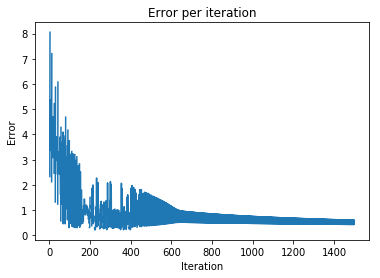

In [362]:
plt.plot(num,loss_vector)
plt.ylabel('Error')
plt.xlabel("Iteration")
plt.title("Error per iteration")
plt.show()